In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.datasets import make_classification
# import seaborn as sns

In [64]:
size = 1000
np.random.seed(12356)
data = np.random.rand(size,2)
lable = np.zeros(size)
noise = np.random.normal(0,0.1,size)
noise.shape = [1000, 1]

for i in range(len(data)):
    res = data[i][1] + data[i][0] + noise[i]
    #  y = 1 - x     
    if res > 1:
        lable[i] = 1
    else:
        lable[i] = 0

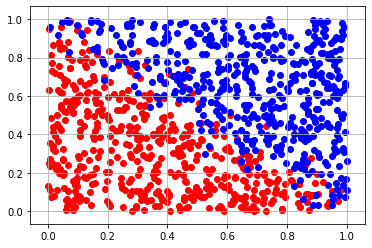

In [66]:
fig, ax = plt.subplots()
ax.scatter(data[lable==0,0], data[lable==0,1], c='red')
ax.scatter(data[lable==1,0], data[lable==1,1], c='blue')
ax.grid(True)
plt.show()

In [71]:
def sigmoid(x, theta):
    return 1. / (1 + np.exp(-(theta.T*x)))

In [78]:
sigmoid(np.array([0]),np.array([1]))

array([0.5])

In [68]:
def cost_function(x,y,theta):
    

0.5